In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

In [2]:
url = 'https://www.opinet.co.kr/user/main/mainView.do'
driver = webdriver.Chrome()
driver.get(url)

## 리스트 가져오기

In [4]:
#팝업창 싼주유소 찾기 클릭
driver.find_element(By.CSS_SELECTOR, '.ic_m1').click()

In [6]:
#서울 자치구 리스트를 가져오기
metro = driver.find_element(By.XPATH, '//*[@id="SIDO_NM0"]')
metro.send_keys('서울')

In [11]:
# 서울 광역시도 가져오기
sigungu = driver.find_element(By.XPATH, '//*[@id="SIGUNGU_NM0"]')
gu_list = sigungu.find_elements(By.CSS_SELECTOR, 'option')
# for gu in gu_list:
#     print(gu.text)

In [12]:
gu_name = [gu.text for gu in gu_list]
gu_name

['시/군/구',
 '강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [13]:
del gu_name[0]

In [14]:
gu_name

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [15]:
#엑셀 저장
driver.find_element(By.XPATH, '//*[@id="glopopd_excel"]/span' ).click()

In [16]:
# 25개 자치구에 대해서 주유소 정보를 저장
for gu in gu_name:
    sigungu = driver.find_element(By.XPATH, '//*[@id="SIGUNGU_NM0"]')
    time.sleep(2)
    sigungu.send_keys(gu)
    time.sleep(2)
    
    driver.find_element(By.XPATH, '//*[@id="glopopd_excel"]/span' ).click()
    time.sleep(2)

In [17]:
driver.close()

# 구별 휘발율 가격 데이터 정리
* 다운받은 파일합치기 


In [18]:
from glob import glob

In [21]:
glob(r'C:\Users\tjoeun\Downloads\지역*.xls') 

['C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (1).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (10).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (11).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (12).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (13).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (14).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (15).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (16).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (17).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (18).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (19).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (2).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (20).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (21).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (22).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (23).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (24).xls',
 'C:\\Users\\tjoeun\\Downloads\\지역_위치별(주유소) (3).xls',
 'C:\\Users\\

In [22]:
file = glob(r'C:\Users\tjoeun\Downloads\지역*.xls')[0]
df = pd.read_excel(file, header=2)
df.head(2)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1569,1669,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1584,1753,-


In [24]:
#25개 파일을 읽어서 하나의 데이터로 만들기
df_list = []
for file in glob(r'C:\Users\tjoeun\Downloads\지역*.xls'):
    gs = pd.read_excel(file, header=2)
    df_list.append(gs)
df = pd.concat(df_list)
df.shape

(443, 10)

In [26]:
df.head(2)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1569,1669,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1584,1753,-


In [27]:
df = df[['상호', '주소', '휘발유', '셀프여부','상표']]
df.head(2)

,상호,주소,휘발유,셀프여부,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1569,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1584,N,현대오일뱅크


In [30]:
df.rename(columns={"휘발유" : "가격", "셀프여부":"셀프"}, inplace=True)
df.head(3)

,상호,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1569,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1584,N,현대오일뱅크
2,(주)소모에너지 신월주유소,서울 강동구 양재대로 1323 (성내동),1596,Y,GS칼텍스


In [31]:
df['구'] = df.주소.str.split().str[1]

In [32]:
df.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1569,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1584,N,현대오일뱅크,강동구
2,(주)소모에너지 신월주유소,서울 강동구 양재대로 1323 (성내동),1596,Y,GS칼텍스,강동구
3,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1616,N,GS칼텍스,강동구
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1635,Y,GS칼텍스,강동구


In [33]:
df.구.unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [34]:
len(df.구.unique())

25

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 0 to 32
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      443 non-null    object
 1   주소      443 non-null    object
 2   가격      443 non-null    int64 
 3   셀프      443 non-null    object
 4   상표      443 non-null    object
 5   구       443 non-null    object
dtypes: int64(1), object(5)
memory usage: 24.2+ KB


In [39]:
df.가격 = df.가격.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 0 to 32
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      443 non-null    object
 1   주소      443 non-null    object
 2   가격      443 non-null    int32 
 3   셀프      443 non-null    object
 4   상표      443 non-null    object
 5   구       443 non-null    object
dtypes: int32(1), object(5)
memory usage: 22.5+ KB


In [40]:
df.to_csv('서울_주유소(230113).csv', index=False)

## 셀프주유소가 정말 저렴한지 확인

In [42]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [44]:
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'

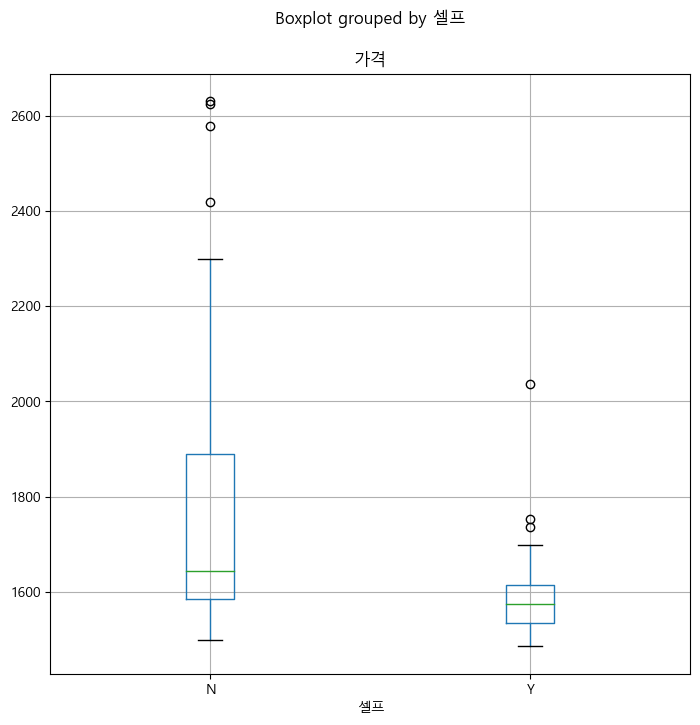

In [45]:
df.boxplot(column='가격', by='셀프', figsize=(8,8))
plt.show()

In [46]:
df[df.셀프 == 'Y'].가격.mean(), df[df.셀프 == 'N'].가격.mean()

(1581.7707509881423, 1746.4526315789474)

In [47]:
df[df.셀프 == 'Y'].shape, df[df.셀프 == 'N'].shape

((253, 6), (190, 6))

# 독립표본 T 검정
* 2 - sample T 검정(독립표본 T검정)
* p-value 가 0.05보다 작으면 귀무가설을 기각, 대립가설을 채택
      - 귀무가설(H0) : 셀프 주유소와 일반 주유소의 가격차이가 없다
      - 대립가설(H1) : 셀프 주유소의 가격이 일반주유소와 차이가 있다.

In [52]:
import scipy as sp #설치되어 있지 않으면 주피터에서 !pip install scipy 
sp.stats.ttest_ind(df[df.셀프 == 'Y'].가격, df[df.셀프=='N'].가격, equal_var=False)

Ttest_indResult(statistic=-9.362749592727637, pvalue=1.3691530542543917e-17)

In [54]:
df.상표.unique()

array(['현대오일뱅크', 'GS칼텍스', 'SK에너지', 'S-OIL', '알뜰(ex)', '자가상표', '알뜰주유소'],
      dtype=object)

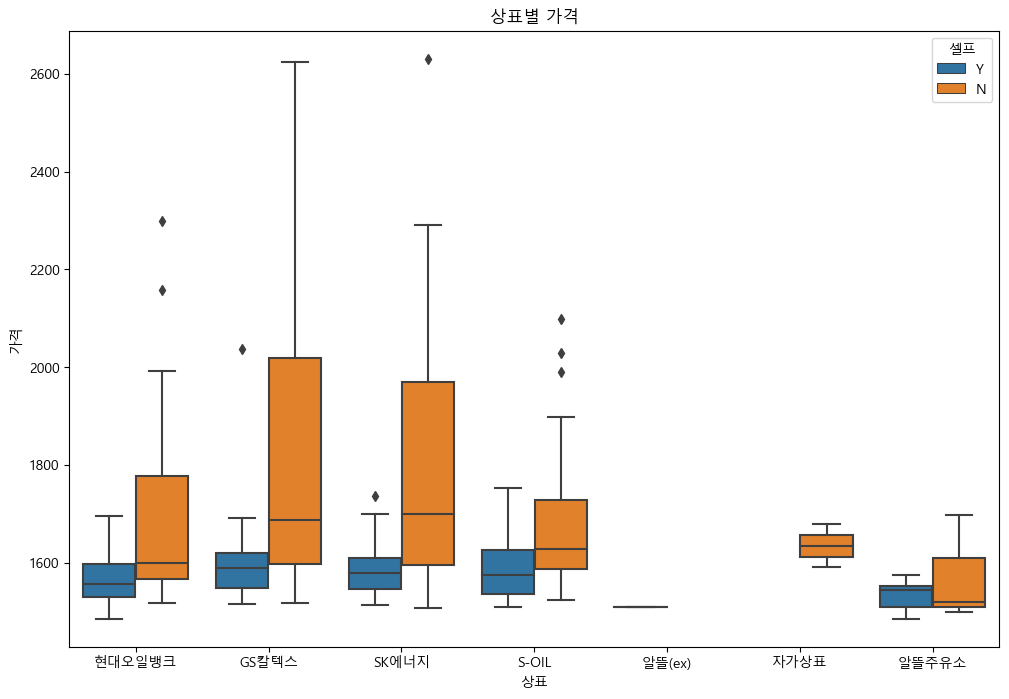

In [56]:
# 상표별로 가격 확인
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=df)
plt.title('상표별 가격')
plt.show()

## 구별 휘발유 가격비교

In [105]:
import json, folium

In [51]:
# 중간에 다시 시작 할경우 파일을 로드하여 다시 수행할 것
# import pandas as pd
# df = pd.read_csv('서울_주유소(230113).csv')

In [52]:
# 가격이 싼 주유소 TOP 5
df.sort_values(by='가격').head()

,상호,주소,가격,셀프,상표,구
288,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),1485,Y,현대오일뱅크,강서구
289,화곡역주유소,서울 강서구 강서로 154 (화곡동),1485,Y,알뜰주유소,강서구
290,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1498,N,알뜰주유소,강서구
40,마포시엠주유소,서울 마포구 월드컵북로 62,1507,N,SK에너지,마포구
41,성산대교셀프주유소,서울 마포구 성산로 144,1507,Y,현대오일뱅크,마포구


In [53]:
# 가격이 비싼 주유소 TOP 5
df.sort_values(by='가격', ascending=False).head()

,상호,주소,가격,셀프,상표,구
274,서남주유소,서울 중구 통일로 30,2631,N,SK에너지,중구
240,서계주유소,서울 용산구 청파로 367 (청파동),2625,N,GS칼텍스,용산구
442,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578,N,GS칼텍스,강남구
273,필동주유소,서울 중구 퇴계로 196 (필동2가),2419,N,GS칼텍스,중구
441,(주)새서울네트웍스 제이제이주유소,서울 강남구 언주로 716,2298,N,현대오일뱅크,강남구


In [54]:
#구별 비교 평균이 제일 큰 순으로
df.groupby('구')['가격'].agg(['mean', 'min', 'max']).sort_values(by='mean', ascending=False)
      

,mean,min,max
구,,,
용산구,2084.750000,1778,2625
중구,1975.200000,1609,2631
강남구,1874.575758,1605,2578
종로구,1853.750000,1569,2220
성동구,1719.500000,1524,2098
강동구,1683.428571,1569,2028
서초구,1673.633333,1509,1989
구로구,1639.800000,1525,2198
영등포구,1635.296296,1517,2199


In [55]:
# 컬럼이 최대값인 최소값인지 판단하는 컬럼을 만들어줌
# 0으로 초기화
import numpy as np
df['mm'] = 0
# df['mm']  = np.zeros(df.shape[0], int)  넘파이를 써도 됨

In [56]:
# 해당구에서 최대값 최소값만 구하기
gu_mm = df.groupby('구')['가격'].agg(['mean', 'min', 'max']).sort_values(by='mean', ascending=False)

In [57]:
gu_mm.head(3)

,mean,min,max
구,,,
용산구,2084.750000,1778,2625
중구,1975.200000,1609,2631
강남구,1874.575758,1605,2578


In [58]:
# 해당 구에서 최대값 최소값 만 구하기 예시 강남구
# _ 변수는 평균이 들어가며 분석에 재사용하지 않기 때문에 '_'로 변수를 처리하였음
_, mi, mx = gu_mm.loc['강남구']
mi, mx = int(mi), int(mx)
mi, mx

(1605, 2578)

In [59]:
#mm 컬럼에 가격과 최소값(mi)과 같으면 1,  최대값(mx)과 같으면 2
for gu in gu_mm.index:
    _, mi, mx = gu_mm.loc[gu]
    mi, mx = int(mi), int(mx)
    for i in df.index:
        if df.가격[i] == mi and df.구[i] == gu:
            df.mm[i] = 1
        if df.가격[i] == mx and df.구[i] == gu:
            df.mm[i] = 2

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_8520\3474424920.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.mm[i] = 1
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_8520\3474424920.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.mm[i] = 2


In [60]:
df.head(3)

,상호,주소,가격,셀프,상표,구,mm
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1569,Y,현대오일뱅크,강동구,1
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1584,N,현대오일뱅크,강동구,0
2,(주)소모에너지 신월주유소,서울 강동구 양재대로 1323 (성내동),1596,Y,GS칼텍스,강동구,0


In [61]:
# 원본 df는 두고 새로운 df1을 만들어준후 mm컬럼값이 0인 것 제거
df1 = df[df.mm !=0]
df1.head(3)

,상호,주소,가격,셀프,상표,구,mm
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1569,Y,현대오일뱅크,강동구,1
13,광성주유소,서울 강동구 올림픽로 673 (천호동),2028,N,S-OIL,강동구,2
14,동서울고속주유소,서울 동대문구 한천로 414,1520,Y,SK에너지,동대문구,1


##  카카오 api 사용해서 위도경도 가져오기

In [62]:
import requests
from urllib.parse import quote

In [63]:
with open ('kakao.txt') as file:
    kakao_key = file.read()

In [64]:
local_url = 'https://dapi.kakao.com/v2/local/search/address.json'
header = {'Authorization':f'KakaoAK {kakao_key}'}

In [65]:
# 반복문을 통해서 모든 소방청 위도 경도 좌표 구하기
# df1 으로 위도경도값을 받으면 주소를 모두 받을 수 있음
lng_list, lat_list = [], []
for i in df1.index:
    url = f'{local_url}?query={quote(df1.주소[i])}'
    result = requests.get(url, headers=header).json()
    try: 
        lng_list.append(float(result['documents'][0]['x']))
        lat_list.append(float(result['documents'][0]['y']))
    except:
        print(df.상호[i])

In [35]:
# 만약 최소값이나 최대값이 있는 지점의 주소를 받아올수 없는 경우  해당 지점 인덱스 확인후  삭제
# df[df.상호.isin(['성원이앤에스(주)영등포지점'])].주소

213    서울 영등포구 국회대로52길 9-13 (영등포동7가)
Name: 주소, dtype: object

In [66]:
# url = f'{local_url}?query={quote("서울 영등포구 국회대로52길 9-13")}'
# result = requests.get(url, headers=header).json()
# result

{'documents': [],
 'meta': {'is_end': True, 'pageable_count': 0, 'total_count': 0}}

In [36]:
# 원래df에서 주소를 찾지못한 지점의 인덱스를 삭제함
# df = df.drop(index=[48, 213], axis=0)
# df.shape

In [39]:
# 다시 한번 반복문을 통해서 모든 주유소 위도 경도 좌표 구하기
lng_list, lat_list = [], []
for i in df.index:
    url = f'{local_url}?query={quote(df.주소[i])}'
    result = requests.get(url, headers=header).json()
    try: 
        lng_list.append(float(result['documents'][0]['x']))
        lat_list.append(float(result['documents'][0]['y']))
    except:
        print(df.상호[i])

In [44]:
df1['위도'] = lat_list
df1['경도'] = lng_list

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_8520\197933941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['위도'] = lat_list
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_8520\197933941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['경도'] = lng_list


In [41]:
import folium

In [46]:
df1.head()

,상호,주소,가격,셀프,상표,구,mm,위도,경도
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1569,Y,현대오일뱅크,강동구,1,37.536417,127.149372
13,광성주유소,서울 강동구 올림픽로 673 (천호동),2028,N,S-OIL,강동구,2,37.541577,127.124242
14,동서울고속주유소,서울 동대문구 한천로 414,1520,Y,SK에너지,동대문구,1,37.597544,127.068039
30,한영주유소 (한화),서울 동대문구 망우로 38 (휘경동),1790,N,현대오일뱅크,동대문구,2,37.588425,127.057395
31,지에스칼텍스(주) 대방주유소,서울 동작구 여의대방로 214,1555,N,GS칼텍스,동작구,1,37.505736,126.922881


In [48]:
import json
filename = 'skorea_municipalities_geo_simple.json'
geo_str = json.load(open(filename, encoding='utf8'))

In [49]:
map  = folium.Map(location =[37.5502, 126.982], zoom_start=12)
for i in df1.index:
    folium.Marker(
        location=[df.위도[i], df.경도[i]],
        tooltip = f'{df.상호[i]} <br>휘발유 : {df.가격[i]:,d}원',
        popup = folium.Popup(df.주소[i], max_width=200),
        icon = folium.Icon(color='green' if df1.mm[i] == 1 else 'red',
                           icon = 'glyphicon glyphicon-thumbs-up' if df1.mm[i] == 1 else 'glyphicon glyphicon-thumbs-down')
    ).add_to(map)
map